In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
def sm_kernel(x,y,w,mu,v):
    """Spectral mixture kernel with multiple Q components
    as set in the paper example
    x,y: shapes a 1D array
    w,mu,v parameters (theta)"""
    x = x[:, None]
    y = y[None, :]
    
    tau = x - y
    
    K = np.zeros_like(tau, dtype=float)
    for q in range(len(w)):
        K += w[q] * np.exp(-2* np.pi**2 * v[q] * tau**2) * np.cos(2 * np.pi * mu[q] * tau)
    return K

        

In [3]:
def sample_gp(x,w,mu,v, noise = 1e-6):
    K = sm_kernel(x,x,w,mu,v)
    K += noise * np.eye(len(x))
    return np.random.multivariate_normal(mean=np.zeros(len(x)), cov=K)

In [4]:
x = np.linspace(0, 10, 300)

In [6]:
# trying settings

#1. lower frequency
w1 = np.array([3.0]); mu1 = np.array([0.2]); v1 = np.array([0.1])

# 2. higher frequency
w2 = np.array([1.0]); mu2 = np.array([0.6]); v2 = np.array([0.5])

# 3) mixture of two frequencies
w3 = np.array([0.7, 0.3]); mu3 = np.array([0.2, 0.9]); v3 = np.array([0.1, 0.05])

f1 = sample_gp(x, w1, mu1, v1)
f2 = sample_gp(x, w2, mu2, v2)
f3 = sample_gp(x, w3, mu3, v3)

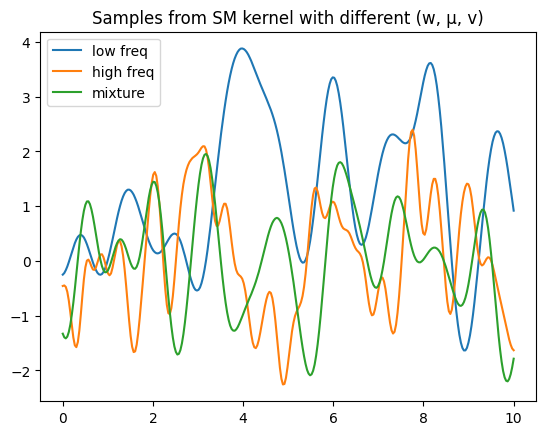

In [7]:
plt.figure()
plt.plot(x, f1, label="low freq")
plt.plot(x, f2, label="high freq")
plt.plot(x, f3, label="mixture")
plt.legend()
plt.title("Samples from SM kernel with different (w, μ, v)")
plt.show()


**mu**: as mu increases --> more oscillations. Example: from 0.2 to 0.6 from model 1 to 2.

**v**: as v increases --> shorter length-scale (oscilations decays faster). Example: again we see shorter fluctations in the oscilations in high frequency setting.


**w**: increases/decreases --> amplitude of that component. We can see how the low frequency setting has a higher w meaning it has a higher amplitude in the y spectrum